In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pkl
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter

In [2]:
file_paths = [
    '../../data/testing_training_data/merged_ref_data_iter_1.pkl',
    '../../data/testing_training_data/merged_ref_data_iter_2.pkl',
    '../../data/testing_training_data/merged_testing_data_iter_3.pkl'
]

merged_data = {}
for file_path in file_paths:
    with open(file_path, 'rb') as f:
        data = pkl.load(f)
        merged_data.update(data)  

In [3]:
merged_data.keys()


In [4]:

q_core = np.asarray([item for subarray in merged_data['q_core'] for item in subarray])
z = np.asarray([item for subarray in merged_data['z'] for item in subarray])

q_core_dict = {
    "H": q_core[z == 1],
    "C": q_core[z == 6],
    "N": q_core[z == 7],
    "O": q_core[z == 8],
    "S": q_core[z == 16],
}


data_df = []
for element, values in q_core_dict.items():
    data_df.extend([(element, value) for value in values])

df = pd.DataFrame(data_df, columns=["Element", "Value"])

/tmp/ipykernel_626393/1079846267.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Element", y="Value", data=df[df["Element"] == element], ax=ax, palette='colorblind')
/tmp/ipykernel_626393/1079846267.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Element", y="Value", data=df[df["Element"] == element], ax=ax, palette='colorblind')
/tmp/ipykernel_626393/1079846267.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Element", y="Value", data=df[df["Element"] == element], ax=ax, palette='colorblind')
/tmp/ipykernel_6

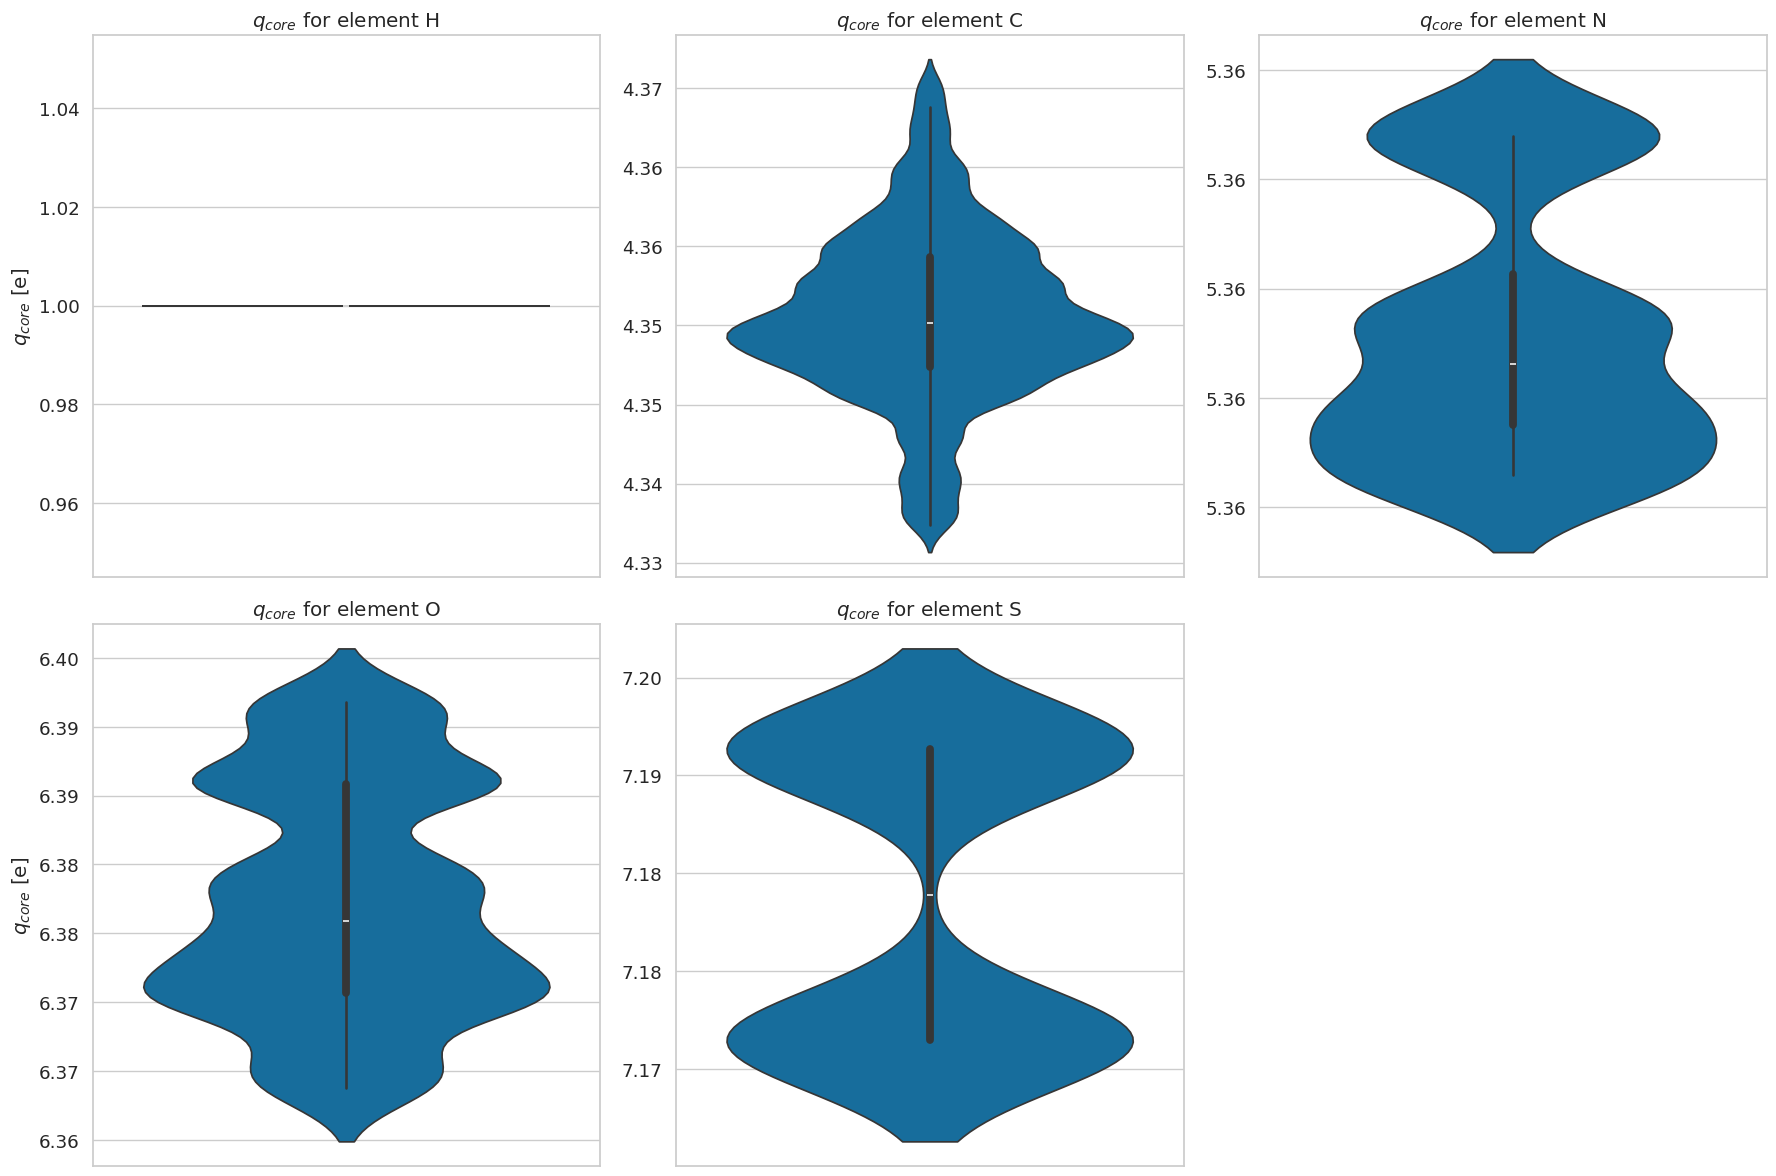

In [10]:

sns.set(style='whitegrid', font_scale=1.2, palette='colorblind')

num_elements = len(q_core_dict)
num_cols = 3
num_rows = (num_elements + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows))
axes = axes.flatten()

def format_ticks(x, pos):
    return f"{x:.2f}"

# Loop through each element and create a violin plot
for idx, (ax, (element, values)) in enumerate(zip(axes, q_core_dict.items())):
    sns.violinplot(x="Element", y="Value", data=df[df["Element"] == element], ax=ax, palette='colorblind')
    ax.set_title(r"$q_{core}$ for element" + f" {element}")
    ax.set_xticks([])
    ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
    if idx % num_cols != 0:
        ax.set_ylabel("")
    if idx % num_cols == 0:
        ax.set_ylabel("$q_{core}$ [e]")
    ax.set_xlabel("")

for i in range(num_elements, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.savefig("fig_si_q_core_distribution_violin.pdf", bbox_inches='tight', dpi=300)
plt.show()